Wavelet Transformastion


In [ ]:
!pip install pywavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 27.4 MB/s eta 0:00:00


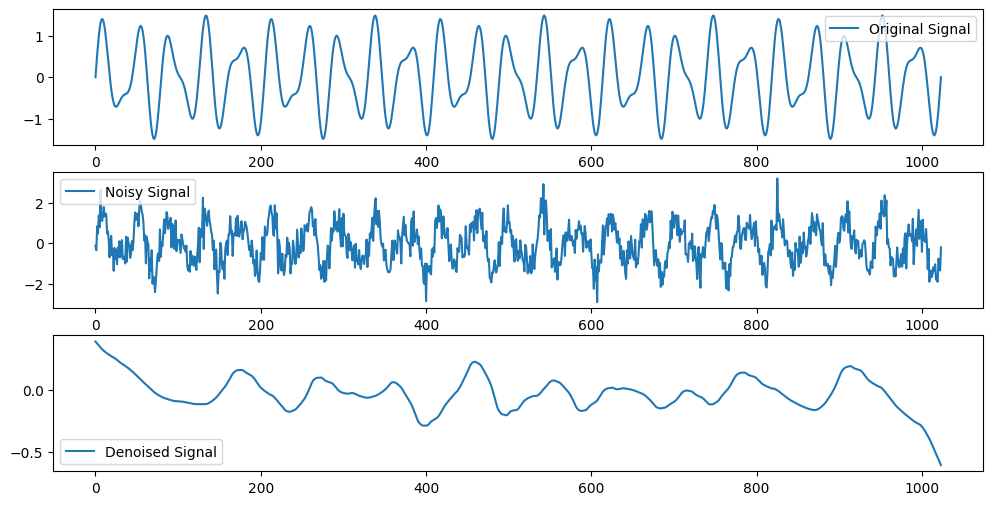

In [ ]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Generate a sample signal with noise
time = np.linspace(0, 1, num=1024)
signal = np.sin(50 * np.pi * time) + 0.5 * np.sin(80 * np.pi * time)
noise = 0.5 * np.random.randn(1024)
signal_noisy = signal + noise

# Apply Discrete Wavelet Transform (DWT)
coeffs = pywt.wavedec(signal_noisy, 'db4', level=5)

# Reconstruct signal from DWT coefficients for denoising
coeffs[1:] = [np.zeros_like(coef) for coef in coeffs[1:]]
signal_denoised = pywt.waverec(coeffs, 'db4')

# Plot original, noisy, and denoised signals
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(signal, label='Original Signal')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(signal_noisy, label='Noisy Signal')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(signal_denoised, label='Denoised Signal')
plt.legend()
plt.show()


Fourier Transformation

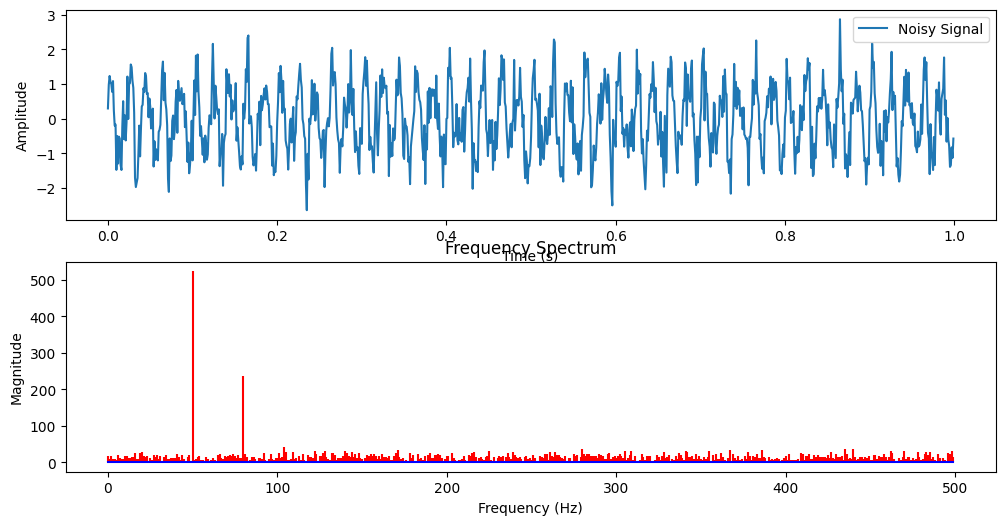

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a sample signal
sampling_rate = 1000  # samples per second
duration = 1          # seconds
time = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
signal = np.sin(50 * 2 * np.pi * time) + 0.5 * np.sin(80 * 2 * np.pi * time)
noise = 0.5 * np.random.randn(len(time))
signal_noisy = signal + noise

# Apply Fast Fourier Transform (FFT)
fft_values = np.fft.fft(signal_noisy)
frequencies = np.fft.fftfreq(len(fft_values), 1 / sampling_rate)

# Plot the original and noisy signal in time domain
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(time, signal_noisy, label='Noisy Signal')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()

# Plot the magnitude of FFT in frequency domain
plt.subplot(2, 1, 2)
plt.stem(frequencies[:len(frequencies)//2], np.abs(fft_values[:len(fft_values)//2]), 'r', markerfmt=" ", basefmt="-b")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Spectrum")
plt.show()
